# Table of Contents

* [Data Sources](#Data-Sources)
* [Gather the Data](#Gather-the-Data)
* [Explore the Data](#Explore-the-Data)
    * [Merge the titleBasics and titleRatings Data](#Merge-the-titleBasics-and-titleRatings-Data)
    * [Explore titleType From titleBasics](#Explore-titleType-From-titleBasics)
    * [Explore Rows with Null Data](#Explore-Rows-with-Null-Data)
    * [Determine What Timeframe to Include](#Determine-What-Timeframe-to-Include)
    * [Determine What Genres to Include](#Determine-What-Genres-to-Include)
    * [Determine the Target Average Rating](#Determine-the-Target-Average-Rating)
* [Model the Data](#Model-the-Data)
* [Visualize the Results](#Visualize-the-Results)


<hr>

## Data Sources

Description of the IMDB data: https://www.imdb.com/interfaces/

IMDB Data Sources: https://datasets.imdbws.com/

<hr>

## Gather the Data

In [57]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

sns.set(rc={'figure.figsize': (12, 10), "lines.markeredgewidth": 0.5 })

In [26]:
# display imdb documentation in the notebook
from IPython.display import IFrame
IFrame("../IMDB Dataset Descriptions.pdf", 800, 600)

In [3]:
# display imdb ER Diagram in the notebook
from IPython.display import IFrame
IFrame("../../Presentation/IMDB ERD.pdf", 800, 600)

In [4]:
#===============================================================================
#     READ INPUT DATA
#===============================================================================

#--------------------------------------------------------
#--  Input File 1:  name.basics.tsv
#--------------------------------------------------------
#print('Reading name.basics.tsv')
#nameBasics = pd.read_csv("./Data/name.basics.tsv/data.tsv", sep='\t')
#print('Complete - 1 of 7')
#print(nameBasics.head(5))

#--------------------------------------------------------
#--  Input File 2:  title.akas.tsv
#--------------------------------------------------------
#print('Reading title.akas.tsv')
#titleAkas = pd.read_csv("./Data/title.akas.tsv/data.tsv", sep='\t',dtype={"titleId": object, "ordering": object, "title": object, "region": object, "language": object, "types": object, "attributes": object, "isOriginalTitle": object})
#print('Complete - 2 of 7')
#print(titleAkas.head(5))

#--------------------------------------------------------
#--  Input File 3:  title.basics.tsv
#--------------------------------------------------------
print('Reading title.basics.tsv')
titleBasics = pd.read_csv("../Data/title.basics.tsv/data.tsv", sep='\t',dtype={"tconst": object, "titleType": object, "primaryTitle": object, "originalTitle": object, "isAdult": object, "startYear": object})
#print('Complete - 3 of 7')
titleBasics = titleBasics[titleBasics.isAdult == "0"]
print(titleBasics.head(5))

#--------------------------------------------------------
#--  Input File 4:  title.crew.tsv
#--------------------------------------------------------
#print('Reading title.crew.tsv')
#titleCrew = pd.read_csv("./Data/title.crew.tsv/data.tsv", sep='\t')
#print('Complete - 4 of 7')
#print(titleCrew.head(5))

#--------------------------------------------------------
#--  Input File 5:  title.episode.tsv
#--------------------------------------------------------
#print('Reading title.episode.tsv')
#titleEpisode = pd.read_csv("./Data/title.episode.tsv/data.tsv", sep='\t')
#print('Complete - 5 of 7')
#print(titleEpisode.head(5))

#--------------------------------------------------------
#--  Input File 6:  title.principals.tsv
#--------------------------------------------------------
#print('Reading title.principals.tsv')
#titlePrincipals = pd.read_csv("./Data/title.principals.tsv/data.tsv", sep='\t')
#print('Complete - 6 of 7')
#print(titlePrincipals.head(5))

#--------------------------------------------------------
#--  Input File 7:  title.ratings.tsv
#--------------------------------------------------------
print('Reading title.ratings.tsv')
titleRatings = pd.read_csv("../Data/title.ratings.tsv/data.tsv", sep='\t',dtype={"tconst": object, "averageRating": float, "numVotes": int})
print('CompletitleRatingste - 7 of 7')
print(titleRatings.head(5))

print('\n-----all data loaded -----')

Reading title.basics.tsv
      tconst titleType            primaryTitle           originalTitle  \
0  tt0000001     short              Carmencita              Carmencita   
1  tt0000002     short  Le clown et ses chiens  Le clown et ses chiens   
2  tt0000003     short          Pauvre Pierrot          Pauvre Pierrot   
3  tt0000004     short             Un bon bock             Un bon bock   
4  tt0000005     short        Blacksmith Scene        Blacksmith Scene   

  isAdult startYear endYear runtimeMinutes                    genres  
0       0      1894      \N              1         Documentary,Short  
1       0      1892      \N              5           Animation,Short  
2       0      1892      \N              4  Animation,Comedy,Romance  
3       0      1892      \N             \N           Animation,Short  
4       0      1893      \N              1                     Short  
Reading title.ratings.tsv
CompletitleRatingste - 7 of 7
      tconst  averageRating  numVotes
0  tt00000

<hr>

## Explore the Data

In [5]:
titleBasics.describe()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
count,5007799,5007799,5007793,5007793,5007799,5007799,5007799,5007799,5007799
unique,5007799,10,2597437,2611189,1,146,94,777,2081
top,tt2815624,tvEpisode,Episode #1.1,Episode #1.1,0,\N,\N,\N,\N
freq,1,3423422,28867,28873,5007799,293222,4966825,3475620,409170


In [6]:
titleRatings.describe()

,averageRating,numVotes
count,854061.000000,8.540610e+05
mean,6.931250,9.778279e+02
std,1.394631,1.537240e+04
min,1.000000,5.000000e+00
25%,6.200000,9.000000e+00
50%,7.100000,2.000000e+01
75%,7.900000,7.700000e+01
max,10.000000,1.976346e+06


In [7]:
len(titleBasics) - len(titleRatings)

4153738

The titleBasics table has 4153738 more rows than the titleRatings table. 

Will need to look at removing NaN were appropriate and get a subset of data that contains only movies.

<hr>

### Merge the titleBasics and titleRatings Data

No need to rename columns as the column names are already consistent and have a way to join naturally using the `tconst` column.

Use of the pandas database-style [`merge()`](http://pandas.pydata.org/pandas-docs/stable/merging.html#database-style-dataframe-joining-merging) function.

In [8]:
# returns an inner join of both dataframes
title_data = pd.merge(titleBasics, titleRatings, how='inner', on=['tconst'])

# Check the length of the resulting join
len(title_data)

836944

In [9]:
title_data.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",5.8,1393
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short",6.5,163
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance",6.6,980
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,\N,"Animation,Short",6.4,98
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,Short,6.2,1674


In [10]:
# check if any rows are missing data
title_data.isnull().sum()

tconst            0
titleType         0
primaryTitle      0
originalTitle     0
isAdult           0
startYear         0
endYear           0
runtimeMinutes    0
genres            0
averageRating     0
numVotes          0
dtype: int64

<hr>

### Explore titleType From titleBasics

In [11]:
title_data.titleType.value_counts()

tvEpisode       358073
movie           217610
short           102860
tvSeries         58193
tvMovie          42237
video            32572
videoGame         8558
tvMiniSeries      8059
tvSpecial         6362
tvShort           2420
Name: titleType, dtype: int64

TitleTypes to include:
- movie, tvMovie

TitleTypes to consider (similar to movies, these have one runtime with no endYear value):
- short, video, tvSpecial, tvShort

In [12]:
title_data_titleType = title_data[title_data.titleType == 'short']

In [13]:
title_data_titleType.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",5.8,1393
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short",6.5,163
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance",6.6,980
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,\N,"Animation,Short",6.4,98
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,Short,6.2,1674


In [14]:
title_data_titleType.endYear.value_counts()

\N    102860
Name: endYear, dtype: int64

In [15]:
title_data_titleType.startYear.describe()

count     102860
unique       138
top         2012
freq        5848
Name: startYear, dtype: object

Apply a mask that removes all title types that are not `movies` or `tvMovies`, then save the results to a new dataframe.

In [16]:
movie_data = title_data[(title_data.titleType == 'movie') | (title_data.titleType == 'tvMovie')]

In [17]:
# Confirm the subset has fewer records than the original dataset
len(movie_data) < len(title_data)
len(movie_data)

259847

Next remove unused columns that contain all NaN or null values.

In [18]:
# Confirm there are no endYear values
movie_data.endYear.value_counts()

\N    259847
Name: endYear, dtype: int64

In [19]:
# drop unused columns
movie_data = movie_data.drop(['isAdult', 'endYear'], axis=1)

movie_data.head()

,tconst,titleType,primaryTitle,originalTitle,startYear,runtimeMinutes,genres,averageRating,numVotes
8,tt0000009,movie,Miss Jerry,Miss Jerry,1894,45,Romance,5.5,67
142,tt0000147,movie,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,1897,20,"Documentary,News,Sport",5.2,259
235,tt0000335,movie,Soldiers of the Cross,Soldiers of the Cross,1900,\N,"Biography,Drama",6.2,35
337,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,70,"Biography,Crime,Drama",6.3,464
353,tt0000615,movie,Robbery Under Arms,Robbery Under Arms,1907,\N,Drama,5.1,13


<hr>

### Explore Rows with Null Data

Next will explore rows with null data and will need to decide if they should be included in the final dataset.

In [20]:
# check if any rows are missing data
movie_data.isnull().sum()

tconst            0
titleType         0
primaryTitle      0
originalTitle     0
startYear         0
runtimeMinutes    0
genres            0
averageRating     0
numVotes          0
dtype: int64

In [21]:
movie_data.runtimeMinutes.unique()

array(['45', '20', '\\N', '70', '120', '60', '53', '50', '48', '100',
       '68', '43', '46', '85', '55', '121', '69', '56', '54', '90', '150',
       '51', '64', '96', '49', '61', '300', '41', '99', '110', '88', '52',
       '86', '72', '78', '75', '148', '59', '63', '112', '1428', '84',
       '65', '105', '81', '199', '109', '74', '80', '82', '67', '195',
       '440', '73', '77', '62', '71', '22', '57', '421', '40', '360',
       '180', '58', '163', '93', '95', '116', '66', '125', '97', '138',
       '350', '374', '87', '108', '16', '83', '136', '94', '13', '117',
       '92', '76', '418', '330', '111', '489', '122', '115', '207', '166',
       '47', '106', '145', '34', '167', '103', '91', '157', '104', '107',
       '248', '79', '235', '184', '89', '102', '131', '114', '380', '119',
       '98', '200', '242', '128', '143', '137', '101', '183', '210',
       '133', '130', '135', '273', '124', '141', '153', '132', '129',
       '123', '144', '155', '151', '170', '140', '113', '359'

In [22]:
movie_data.startYear.unique()

array(['1894', '1897', '1900', '1906', '1907', '1908', '1909', '1910',
       '1912', '1911', '1913', '1919', '1914', '1917', '1915', '1936',
       '1916', '1925', '1918', '1920', '1921', '1924', '1923', '1922',
       '1927', '1929', '1926', '1993', '1935', '1928', '1942', '1933',
       '1930', '1931', '1939', '1932', '1950', '1938', '1951', '1934',
       '1983', '1946', '1937', '1940', '1941', '1952', '1970', '1957',
       '1943', '1945', '1948', '1944', '2001', '1949', '1953', '1947',
       '1954', '1965', '1973', '1962', '1958', '1955', '1956', '1961',
       '1964', '1960', '1959', '1967', '1963', '1972', '1971', '1969',
       '1968', '1966', '1976', '1990', '1977', '1979', '1974', '1981',
       '1988', '1978', '1989', '1975', '1986', '2016', '1985', '1980',
       '1984', '1982', '1987', '1991', '2005', '1995', '1998', '1992',
       '2002', '1994', '2004', '1996', '1997', '2017', '2000', '1999',
       '2009', '2008', '2003', '2007', '1905', '2006', '2010', '1902',
      

In [41]:
# replace values with '\N' with the pandas 'NaN'
# source: https://stackoverflow.com/a/49406417
movie_data = movie_data.replace({'\\N': np.nan})

In [42]:
# check what rows are missing data
movie_data.isnull().sum()

tconst                0
titleType             0
primaryTitle          0
originalTitle         2
startYear             0
runtimeMinutes    36683
genres            17420
averageRating         0
numVotes              0
dtype: int64

To convert the `startYear` type from an Object to an Int datatype, we need to fill all NaN rows with zero. This allows for the columns to be used in calculations and charts.

**Decision:** Since there are only 4 rows that do not have a start year, we will remove all '0' values from this column.

In [33]:
# fill NaN rows with 0
movie_data['startYear'] = movie_data.startYear.fillna(0)

# convert the column to datatype of int
movie_data['startYear'] = movie_data.startYear.astype(int)

In [50]:
# drop the rows that contain a startYear of 0
# source: https://chrisalbon.com/python/data_wrangling/pandas_dropping_column_and_rows/
movie_data = movie_data[movie_data.startYear != 0]

<hr>

### Determine What Timeframe to Include

Why limit the timeframe? Movies release before a certain period of time are not being reviewed as they are release, where many of the reviews may come from viewers watching the movie(s) years after the initial release. For example, the data from IMDB would not have reviews from the year 1894, the same year the movie was released. 

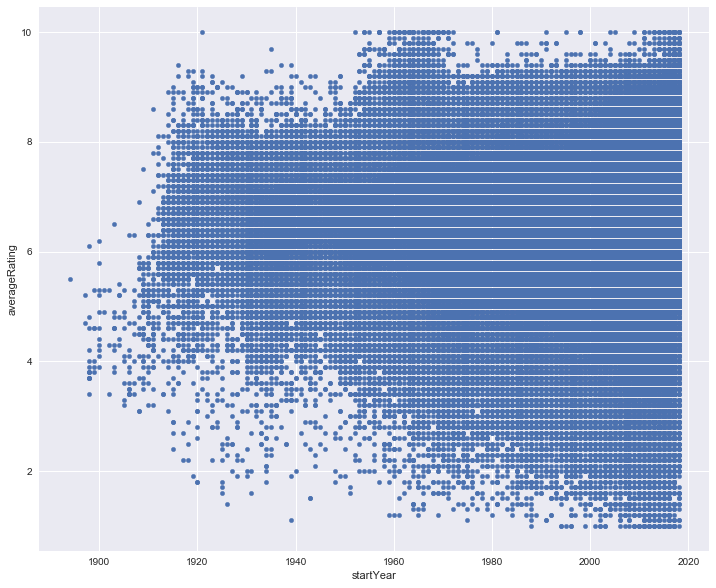

In [51]:
movie_data.plot.scatter(x="startYear", y="averageRating")

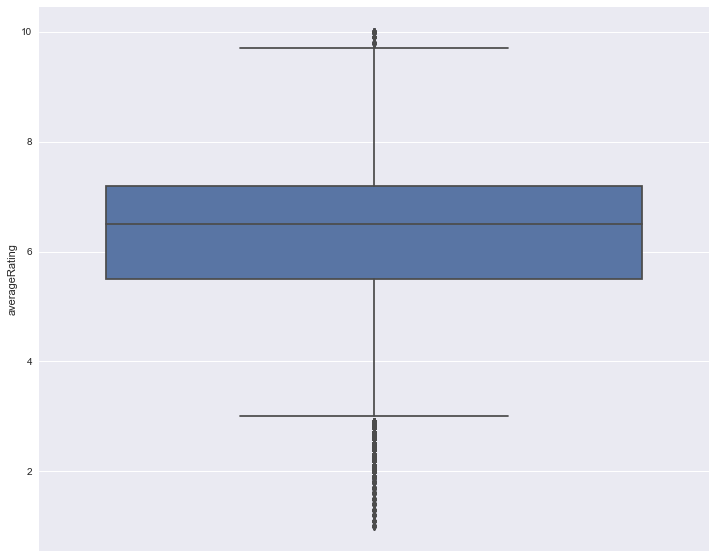

In [53]:
sns.boxplot(y=movie_data.averageRating)

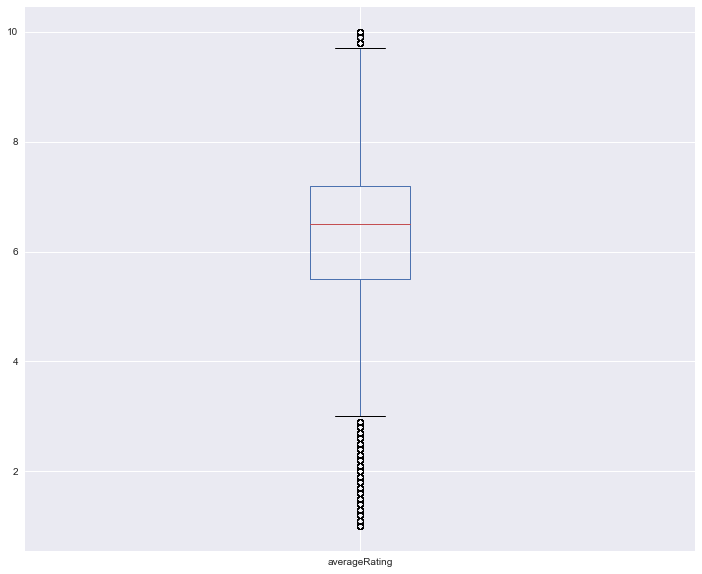

In [54]:
movie_data.averageRating.plot(kind='box')

Calculate the thresholds for the outliers.

In [55]:
q1 = movie_data.averageRating.quantile(0.25)  # first quartile
q3 = movie_data.averageRating.quantile(0.75)  # third quartile
IQR = q3 - q1  # IQR
lower_threshold = q1 - 1.5 * IQR  # lower threshold
upper_threshold = q3 + 1.5 * IQR  # upper threshold
display(lower_threshold, upper_threshold)

2.9499999999999997

9.75

Pivot table that looks at the average movie rating for each year.

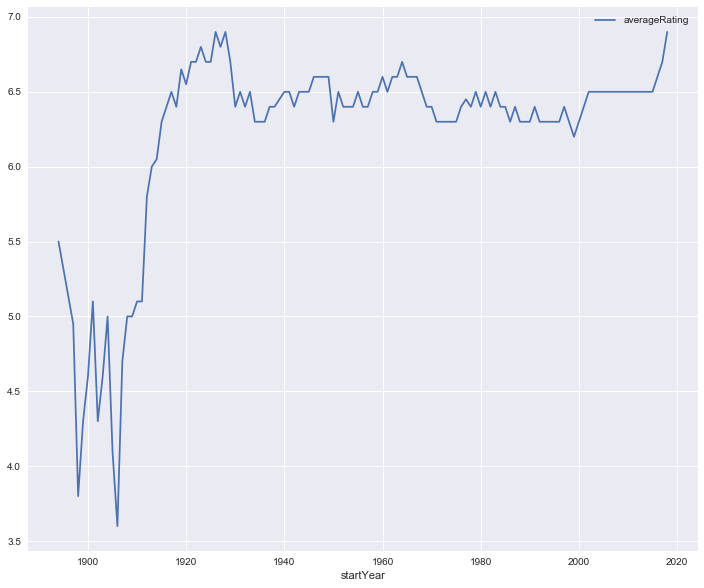

In [59]:
movie_pivot = movie_data.pivot_table(index="startYear", 
                       values=["averageRating"], 
                       aggfunc=pd.np.median)

movie_pivot.plot(kind='line')

It appears the general trend is that average movie ratings increases each year sometime after the year 2000. Should explore reasons why. Could be movie saturation?

<hr>

### Determine What Genres to Include

<hr>

### Determine the Target Average Rating

<hr>

## Model the Data

<hr>

## Visualize the Results